Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что риск убытков посчитан верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Артем, приветствую! Рад познакомиться с тобой в рамках проекта и постараюсь внимательно изучить все замечания и рекомендации 👍.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Теперь все статистики посчитаны правильно, молодец!
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# импортирую библиотеку pandas как главного инструмента для анализа структурных данных и временных рядов
import pandas as pd
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для работы с двумерными графиками
import matplotlib.pyplot as plt
# выберу стиль для plt инструментов
plt.style.use('ggplot')
# импортирую библиотеку scipy для выполнения математических, научных и инженерных расчётов
from scipy import stats as st
# импортирую библиотеку для работы со временем
from datetime import datetime
# импортирую библиотеку для работы с массивами данных. NumPy - основополагающая библиотека, необходимая для научных вычислений
import numpy as np
# импортирую библиотеку и инструменты Scikit-learn - интегратора классических алгоритмов машинного обучения
# алгоритм классификации дерева решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# алгоритм классификации случайный лес
from sklearn.ensemble import RandomForestClassifier
# алгоритм классификации логическая регрессия
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо, рекомендации прошлых ревью стараюсь учитывать в работе. 
</div>

In [2]:
# открываем файлы, создаем переменные
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

**Можем приступать к процессу первичного визуального изучения данных в трех наборах данных согласно условиям кейса**

In [3]:
# рассмотрим первые пять строк во фрейме данных в переменной df_0
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# посмотрим, для более полного первичного представления, последние его 10 строк
df_0.tail(10)

,id,f0,f1,f2,product
99990,uQHju,-0.169592,0.988432,5.153578,121.253686
99991,5aJ79,-0.880711,0.173065,6.962537,152.614843
99992,vgK5D,0.637601,0.751503,2.918322,95.180855
99993,sOhIk,-0.176367,0.912145,5.241132,89.619662
99994,hWIah,1.562007,-0.311641,1.315442,50.092191
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


<div class="alert alert-info"> <b>Комментарий студента:</b> В ходе первичного осмотра датафрейма df_0 наблюдаются следующие его недостатки и положительные стороны:

*1. в столбце 'id' оформление значений в 'верблюжьем регистре', это минус;*

*2.  наименования атрибутов представлены в хорошем стиле, 'змеинный регистр' соблюден, это плюс;*
    
*3. значения NaN (отсутствующее в ячейке число) и значения None (нечисловой тип 'NoneType')  при первичном осмотре не установлены, это плюс,  но совсем исключать этот вопрос нельзя, необходимо убедиться*.

</div>

In [5]:
# пришло время получить общую информацию о данных в таблице df_0 - регион № 1
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**информация из описания данных:**

*Таблица df_0 (регион № 1):*
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

<div style="border:solid DarkCyan 3px; padding: 20px"> Сравним информацию о фрейме данных df_0 с информацияей из описания и определим первые важные выводы для дальнейшей работы. Общее описание содержит сведения, что в фрейме данных df_0 пять столбцов и 100000 строк:

1) по типу данных столбец id — уникальный номер скважины представлен в строчных данных как object, в рамках исследования наиболее удобный тип для проведения анализа данных является целочисленный тип - int64;
    
2) f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы) представлены в типе данных float, что представляется оправданным;
    
3) product —  объём запасов в скважине (тыс. баррелей) представлен в типе данных float с длинным 'хвостом' после запятой. Возможно потребуется для удобства в работе округлить значения.
</div>

In [6]:
# следующий на очереди датафрейм df_1
# рассмотрим первые пять строк во фрейме данных в переменной df_1 - регион № 2
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
# посмотрим последние строки
df_1.tail()

,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103


<div class="alert alert-info"> <b>Комментарий студента:</b> Все замечания и положительные стороны идентичны заключению по результатам первичного осмотра данных для таблицы, связанной с регионом № 1. </div>

In [8]:
# посмотрим общую информацию о данных в таблице df_1 - регион № 2
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**информация из описания данных:**

*Таблица df_1 (регион № 2):*
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

<div style="border:solid DarkCyan 3px; padding: 20px"> Результаты сравнения информации о фрейме данных df_1 с информацияей из описания соответствуют заключению по фрейму данных df_0.
</div>

In [9]:
# посмотрим на последний датафрейм df_2, характеризующий регион № 3
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [10]:
# последние 5 строк
df_2.tail()

,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767


In [11]:
# первичный осмотр дает очевидное заключение, что и этот фрейм по характеристике идентичен предыдущим
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div style="border:solid DarkCyan 3px; padding: 20px"> Результаты сравнения информации о фрейме данных df_2 с информацией из описания соответствуют заключению по фреймам данных df_0, df_1. 
</div>

### Вывод 

*Датафреймы в целом не имеют серьезных проблем и пригодны для применения инструментов проведения исследования. При этом для улучшения их общего состояния и соответственно повышения качества полагаю целеообразным принять слудующий план действий:*

- привести все данные в столбце id к нижнему регистру;
- проверить данные на наличие пропусков и дубликатов;
- минусовые значения в признаках не трогаем, так как по условиям задачи неважно, что они означают, но сами признаки значимы.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корреткно, первичный осмотр проведен.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо 👍
</div>

### Предобработка данных

In [12]:
# для предварительной подготовки к исследованию данных приведем все данные в столбцах id в датасетах к нижнему регистру
df_0['id'] = df_0['id'].str.lower()
df_1['id'] = df_1['id'].str.lower()
df_2['id'] = df_2['id'].str.lower()

In [13]:
# посмотрим, что получилось
df_0.head()

,id,f0,f1,f2,product
0,txeyh,0.705745,-0.497823,1.221170,105.280062
1,2acmu,1.334711,-0.340164,4.365080,73.037750
2,409wp,1.022732,0.151990,1.419926,85.265647
3,ijlyr,-0.032172,0.139033,2.978566,168.620776
4,xdl7t,1.988431,0.155413,4.751769,154.036647


In [14]:
df_1.head()

,id,f0,f1,f2,product
0,kbedx,-15.001348,-8.276000,-0.005876,3.179103
1,62mp7,14.272088,-3.475083,0.999183,26.953261
2,vye1p,6.263187,-5.948386,5.001160,134.766305
3,kcrkz,-13.081196,-11.506057,4.999415,137.945408
4,ahl4o,12.702195,-8.147433,5.004363,134.766305


In [15]:
df_2.head()

,id,f0,f1,f2,product
0,fwxo0,-1.146987,0.963328,-0.828965,27.758673
1,wjtft,0.262778,0.269839,-2.530187,56.069697
2,ovluw,0.194587,0.289035,-5.586433,62.871910
3,q6ca6,2.236060,-0.553760,0.930038,114.572842
4,wpmux,-0.515993,1.716266,5.899011,149.600746


<div class="alert alert-info"> <b>Комментарий студента:</b> Цель достигнута, переходим к вопросу поиска дубликатов. </div>

In [16]:
# проверим данные в фреймах df_0, df_1 и df_2 на наличие пропусков
(df_0.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [17]:
(df_1.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
(df_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<div style="border:solid DarkCyan 3px; padding: 20px"> Наличие пропусков в фреймах не установлены. </div>

In [19]:
# проверим данные в фреймах на наличие дубликатов
(df_0.duplicated().sum())

0

In [20]:
(df_1.duplicated().sum())

0

In [21]:
(df_2.duplicated().sum())

0

<div style="border:solid DarkCyan 3px; padding: 20px"> Наличие дубликатов в фреймах не установлены. </div>

<div style="border:solid DarkCyan 3px; padding: 20px"> С предообработкой датафреймов закончили, план действий выполнен, серьезных проблем с пропусками и наличием дубликатов не установлено. </div>

<div class="alert alert-block alert-success">
<b>Успех:</b> ОК.
</div>

## Обучение и проверка модели

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

<div style="border:solid DarkCyan 3px; padding: 20px"> Кроме того, из условия задачи изестно, что в избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов. Исходя из осмотра данных можно сделать вывод, что фича объем запасов нефти это наш целевой атрибут. Признаки это фичи, которые могут иметь мультиколлениарность отсносительно целевого показателя. Дл построения модели линейной регрессии это особенно важно учитывать.</div>

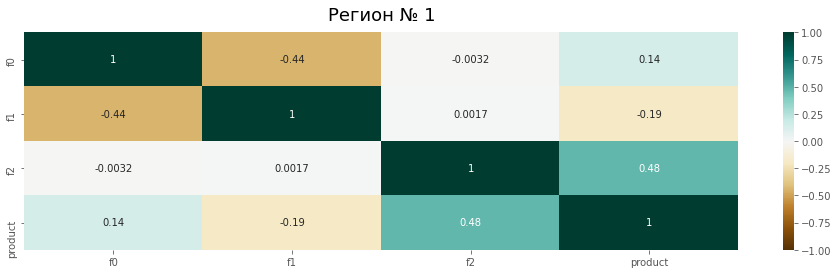

In [22]:
# попробуем провести первую разведку наших данных с помощью тепловой карты
# использую тепловую карту для визуального анализа региона № 1
plt.figure(figsize=(16, 4))
heatmap = sns.heatmap(df_0.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Регион № 1', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь можно отметить, что целевой признак product имеет умеренную корреляцию с признаком f2, у нас наблюдается взаимосвязь. </div>

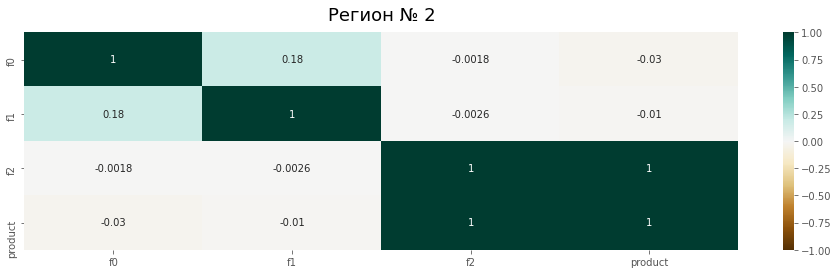

In [23]:
# использую тепловую карту для визуального анализа региона № 2
plt.figure(figsize=(16, 4))
heatmap = sns.heatmap(df_1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Регион № 2', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь можно отметить, что коэффицент корреляции признака f2 имеет абсолютное значение с целевым показателем - product - 1. </div>

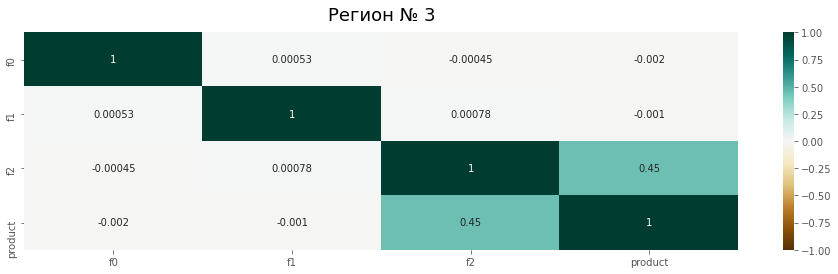

In [24]:
# использую тепловую карту для визуального анализа региона № 3
plt.figure(figsize=(16, 4))
heatmap = sns.heatmap(df_2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Регион № 3', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь можно отметить, что целевой признак product имеет умеренную корреляцию с признаком f2, у нас наблюдается взаимосвязь. </div>

<div style="border:solid DarkCyan 3px; padding: 20px"> Тепловая карта дала небольшие подсказки в работе, а именно, что Регион № 2 имеет признаки F2, которые абсолютно коррелируют с целевым показателем. Этот факт настараживает и требует особенного внимания. Регион № 1 и Регион № 3 имеют признаки F2, которые имеют умеренную корреляцию с целевым показателем  - product. </div>

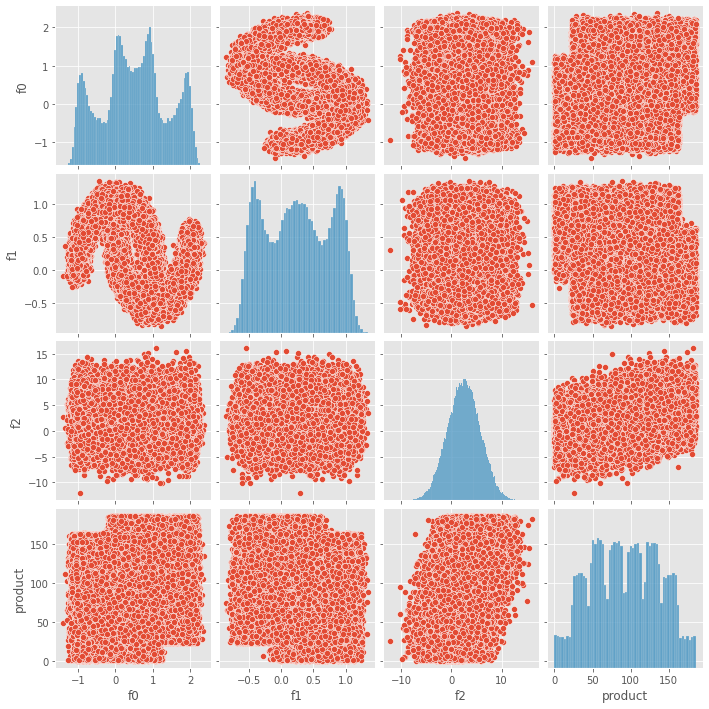

In [25]:
# построим грфики рассеяния pairplot() по региону № 1
sns_plot = sns.pairplot(df_0)
sns_plot.savefig('pairplot.png')

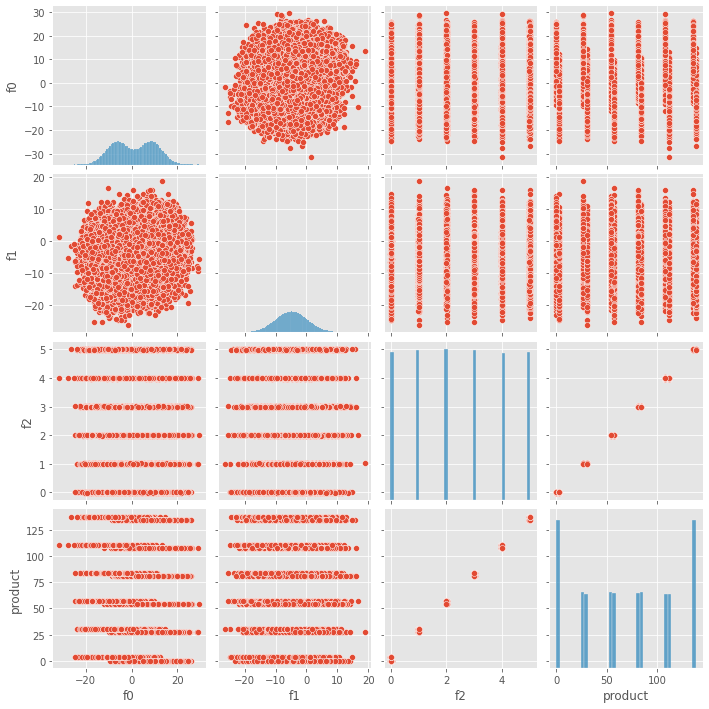

In [26]:
# построим грфики рассеяния pairplot() по региону № 2
sns_plot = sns.pairplot(df_1)
sns_plot.savefig('pairplot.png')

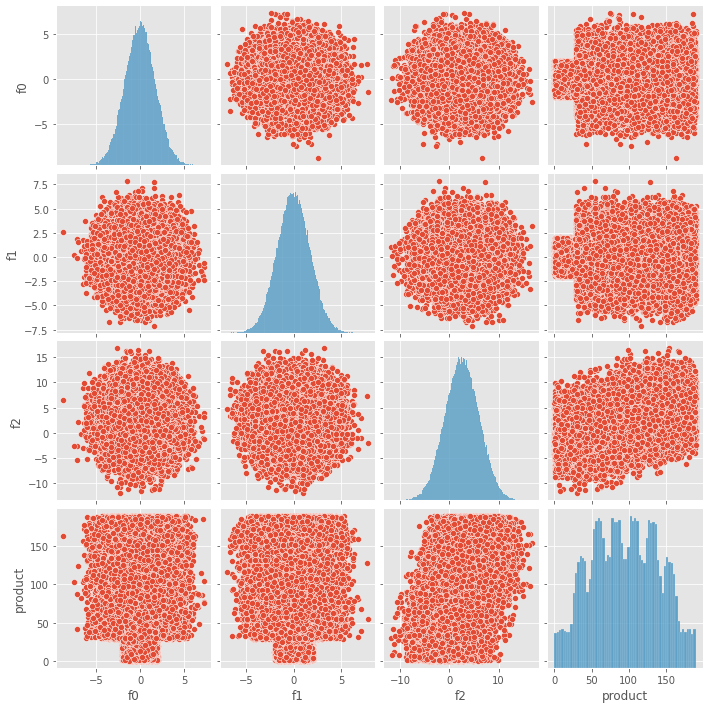

In [27]:
# построим грфики рассеяния pairplot() по региону № 3
sns_plot = sns.pairplot(df_2)
sns_plot.savefig('pairplot.png')

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь можно отметить, что целевой признак product ни на одном графике не получил правильно построенной кривой корреляции с положительным или отрицательным наклоном. </div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что распределения и корреляции были изучены!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо 👍
</div>

In [28]:
# целевой признак product - количественный, значит мы рассматриваем задачу регрессии
# из-за малого количества параметров линейная регрессия менее склонна к переобучению
# для задачи регрессии подходит метрика - cредняя квадратичная ошибка (MSE)
# начнем обучать модель линейной регрессии
model = LinearRegression()

In [29]:
# Обучим и проверим модель для каждого региона.
# Разобьем данные на обучающую и валидационную выборки в соотношении 75:25
# чтобы оптимизировать код создадим единую обучающую функцию для ее последующего применения ко всем трем датафреймам
def learning_function (data):
    # создаем чистые признаки в переменной features, удаляем лишнее
    features = data.drop(['id', 'product'], axis = 1)
    # создаем целевой показатель в переменной target
    target = data['product']
    # разбиваем данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, \
                                                                                  random_state = 12345)
    # обучаем модель обучающими данными, используем метод fit
    model.fit(features_train, target_train)
    # получаем предсказания модели на валидационной (проверочной) выборке
    return pd.Series(model.predict(features_valid)), target_valid

In [30]:
# применим функцию к датафреймам и сохраним ее результаты в переменных
region_1, target_1 = learning_function(df_0)
region_2, target_2 = learning_function(df_1)
region_3, target_3 = learning_function(df_2)

In [31]:
# Чтобы оценить адекватность модели в задачах классификации, нужно найти среднее значение целевого атрибута
# Необходимо также найти MSE по обучающей выборке, чтобы средним целевым показателем предсказать ответ
# Предсказания запишим в переменную predictions
# Далее необходимо извлечь корень из MSE, чтобы метрика показывала просто объемы запасов в скважине (тыс. баррелей)
# напишем функцию с вышеизложенным алгоритмом действий и применим к нашим подготовленным переменным по регионам
def oil_volume (answers, predictions):
    # используем функцию mean_squared_error из библиотеки sklearn
    mse = mean_squared_error(answers, predictions)
    # напечатаем средний объем запасов в скважине (тыс. баррелей)
    print('средний объем запасов в скважине, тыс. баррелей:', predictions.mean())
    #  напечатаем также корень от MSE - величину RMSE, извлечем корень из MSE
    print('RMSE модели:', mse ** 0.5)

In [32]:
# применим подгоовленную функцию oil_volume к нашим переменным по регионам
# начнем с региона № 1
oil_volume(region_1, target_1)

средний объем запасов в скважине, тыс. баррелей: 92.07859674082927
RMSE модели: 37.5794217150813


In [33]:
# регион № 2
oil_volume(region_2, target_2)

средний объем запасов в скважине, тыс. баррелей: 68.72313602435997
RMSE модели: 0.893099286775617


In [34]:
# регион № 3
oil_volume(region_3, target_3)

средний объем запасов в скважине, тыс. баррелей: 94.88423280885438
RMSE модели: 40.02970873393434


### Вывод:
*Известно, что величина RMSE должна быть как можно меньше. Руководствуясь данным критерием Регион № 2 является более предпочтительным. Кроме того, тепловая карта также указаывает на предпочтительность Региона № 2 с коррелирующими признаками F2 к целевым показателям.* 

*Что касается Регионов 1 и 3 то теория построения модели линейной регрессии свидетельствует, что если ошибка намного больше нуля, то  в нашем случае модель объема запасов в скважине переоценила.*   

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Приятный фидбэк, думаю здесь я очень благодарен всем ревьюерам, кто со мной работал! Вы лучшие! 👍
</div>

## Подготовка к расчёту прибыли

**Все ключевые значения для расчётов сохраните в отдельных переменных:**

*Из условия задачи:*
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [35]:
# следуя условиям задачи создаю переменную Development budget
development_budget = 10000000000

In [36]:
# создаем переменную доход с каждой единицы продукта - revenue per unit of product
revenue_product = 450000 

In [37]:
# количество допустимых скважин для бурения - wells for drilling
wells_drilling = 200

In [38]:
# оценка рисков - вероятность убытков меньше 2.5%  - probability of losses
probability_losses = 2.5 * 100

<div style="border:solid DarkCyan 3px; padding: 20px"> Нам известна переменная количества допустимых скважин для бурения и общего бюджета на все скважины, следовательно ы можем получить переменную, которая отразит сколько средств возможно на каждую отдельную скважину по условиям задачи.  </div>

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Это 100 % в копилку, новое знание, благодарю!
</div>

In [39]:
# расчет бюджета на отдельную скважину из 200 предусмотренных
budget_separate_well = development_budget/wells_drilling

In [40]:
print('budget_separate_well, составил:', budget_separate_well) 

budget_separate_well, составил: 50000000.0


<div style="border:solid DarkCyan 3px; padding: 20px"> Располагая перечисленными показателями мы можем также расчитать показатель рентабельности на инвестиции (ROI), который строится как отношение степень эффективности использования материальных, трудовых и денежных ресурсов, а также природных богатств. Коэффициент рентабельности рассчитывается как отношение прибыли к активам, ресурсам или потокам, её формирующим. В нашем случае коэффициент рентабельности будет расчитан как отношение бюджета на одну скважину и дохода с каждой единицы скважины.  </div>

In [41]:
# создаем переменную ROI на единицу продукта
ROI = revenue_product/budget_separate_well

In [42]:
ROI

0.009

<div style="border:solid DarkCyan 3px; padding: 20px"> ROI нам говорит, что  чрезвычайно важно для эффективности вложений инвестиций найти те скважины в которых общий обьем продукта, формиррующий revenue_product, имеет наибольшие значения. </div>

In [43]:
# для поиска 200 лучших для разработки скважин, которые дадут макс значение ROI, напишем функцию отбора скважин
def well_selection (target, probabilities):
    target = pd.Series(target).reset_index(drop = True)
    probabilities = pd.Series(probabilities).reset_index(drop = True)
    sorted_data = probabilities.sort_values(ascending = False)
    selected = target[sorted_data.index][:wells_drilling]
    return ((revenue_product * selected.sum()) - development_budget) / 1000000000

In [44]:
# отбор 200 скважин с наибольшей выручкой в млрд рублей
# применим функцию к региону 1
well_selection(target_1, region_1)

3.3208260431398506

In [45]:
# применим функцию к региону 2
well_selection(target_2, region_2)

2.4150866966815108

In [46]:
# применим функцию к региону 3
well_selection(target_3, region_3)

2.7103499635998327

<div style="border:solid DarkCyan 3px; padding: 20px"> Ожидал, что и здесь регион № 2 окажется вновь в лидерах, но удивительный мир закономерностей показывает, что с экономической точки зрения  200 лучших скважин в регионе № 1 дадут максимальную выручку, которая составит 3,32 млрд. </div>

In [47]:
# по условиям задачи необходимо посчитать минимальное среднее количество продукта в месторождениях региона
# достаточное для разработки
# предполагаю, что необходимо minimum average product quantity найти как отношение budget_separate_well к revenue_product
min_average_product = budget_separate_well/revenue_product

In [48]:
print('Минимальное среднее количество продукта в месторождениях региона:', min_average_product)

Минимальное среднее количество продукта в месторождениях региона: 111.11111111111111


<div style="border:solid DarkCyan 3px; padding: 20px"> Ранее мы установили, что Регион № 1 имеет средний объем запасов в скважине, тыс. баррелей: 92.07859674082927, Регион № 2 имеет  средний объем запасов в скважине, тыс. баррелей: 68.72313602435997, Регион № 3 средний объем запасов в скважине, тыс. баррелей: 94.88423280885438. Следовательно, ни один регион не удовлетворяет требованию как ROI так и минимальному среднему количеству продукта в месторождениях региона: 111.1. </div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 👍
</div>

## Расчёт прибыли и рисков 

**Из инструкции по выполнению проекта следует, что необходимо посчитать риски и прибыль для каждого региона:**
- применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- написать выводы: предложить регион для разработки скважин и обосновать свой выбор.

**Переходим к процедуре Bootstrap**

In [49]:
state = np.random.RandomState(12345)

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было отдельно определить функцию для вычисления прибыли.
</div>

In [64]:
# выполним процедуру bootstrap с 1000 повторений (аналогичную задачу мы решали в тренажере c построением функции)
def revenue_function (target, predictions):
    values = []
    for i in range(1000): # < напишите код здесь>
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state) 
        probs_subsample = predictions[target_subsample.index]
        revenue_app = well_selection(target_subsample, probs_subsample)
        values.append(revenue_app)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    confidence_interval = lower, upper
    mean = values.mean()

    print("средняя выручка:", mean)
    print("2.5%-квантиль:", lower)
    print("доверительный интервал:", confidence_interval)
    print("риски убытка:", (values < 0).mean())

<div class="alert alert-block alert-success">
<b>Успех:</b> Риск найден очень элегантно.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Понял в чем ошибка, начало интервала в переменной lower, а конец — в upper, использовал функцию quantile (). Разница оказалась существенной, но радует то, что  регион № 2 оказался с наименьшим интервалом)  
</div>

<div style="border:solid DarkCyan 3px; padding: 20px"> Функция построена таким образом чтобы ответить на условия задачи, а именно: какая в каждом регионе средняя выручка, квантиль выручки, доверительный интревал и риски убытка, используем функцию к нашим главным переменным по региону и дальше проанализируем их. </div>

In [65]:
# Регион № 1
revenue_function(target_1, region_1)

средняя выручка: 0.3909662311881313
2.5%-квантиль: -0.13114241981572938
доверительный интервал: (-0.13114241981572938, 0.8945900676607657)
риски убытка: 0.068


In [66]:
# Регион № 2
revenue_function(target_2, region_2)

средняя выручка: 0.45361060431718125
2.5%-квантиль: 0.065250085089531
доверительный интервал: (0.065250085089531, 0.8487254034265569)
риски убытка: 0.008


In [67]:
# Регион № 3
revenue_function(target_3, region_3)

средняя выручка: 0.39997640720438093
2.5%-квантиль: -0.10539757012811575
доверительный интервал: (-0.10539757012811575, 0.9436290317135313)
риски убытка: 0.07


<div style="border:solid DarkCyan 3px; padding: 20px"> Анализируя полученные результаты мы можем сделать заключение, что регион № 2 по ключевым показателям  является лидером. Во-первых, в регионе № 2 средняя выручка относительно других регионов выше, квантиль выручки выше, доверительный интревал имеет наименьшее значение и + наименьшее значение риска убытка. </div>

### Вывод:

*В добывающей компании «ГлавРосГосНефть» в должности data scientist мной было бы предложено стейкхолдерам бурить новую скважину в Регионе № 2, обоснованием своей позиции я бы привел следующие аргументы:*
- еще на предварительном осмотре данных тепловая карта показала, что коэффицент корреляции признака f2 в регионе № 2 имел абсолютное значение с целевым показателем - product;
- величина RMSE  показала лучшее минимальное значение в Регионе № 2;
- ключевые показатели такие как средняя выручка относительно других регионов, квантиль выручки, доверительный интревал и наименьшее значение риска убытка совершенно показали лучшие результаты в Регионе № 2 чем и определили его выбор.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта! С выбором региона согласен.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован